In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("car_price_dataset_900.csv")
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,Mercedes,2023,20.92,3078,107,automatic,electric,second,813805.13
1,Mercedes,2017,20.65,2844,339,manual,petrol,second,501144.16
2,BMW,2007,10.19,964,398,automatic,diesel,first,465527.87
3,Hyundai,2022,17.27,1577,361,automatic,hybrid,first,635489.75
4,Toyota,2018,21.53,2386,135,manual,petrol,first,281206.83
...,...,...,...,...,...,...,...,...,...
895,Mercedes,2018,21.48,1949,301,manual,electric,second,757209.24
896,BMW,2018,16.11,3313,195,manual,diesel,first,500238.96
897,Mercedes,2021,23.21,976,101,manual,diesel,first,587924.94
898,Mercedes,2019,12.66,2521,314,automatic,petrol,second,579831.93


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i])
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,4,2023,20.92,3078,107,0,1,1,813805.13
1,4,2017,20.65,2844,339,1,3,1,501144.16
2,0,2007,10.19,964,398,0,0,0,465527.87
3,3,2022,17.27,1577,361,0,2,0,635489.75
4,5,2018,21.53,2386,135,1,3,0,281206.83
...,...,...,...,...,...,...,...,...,...
895,4,2018,21.48,1949,301,1,1,1,757209.24
896,0,2018,16.11,3313,195,1,0,0,500238.96
897,4,2021,23.21,976,101,1,0,0,587924.94
898,4,2019,12.66,2521,314,0,3,1,579831.93


In [6]:
x=df.drop("price",axis=1)
y=df["price"]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=34)


,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type
693,1,2012,19.15,2779,192,1,3,0
503,5,2024,12.08,1930,355,1,0,0
737,4,2007,20.16,3423,147,0,3,0
613,1,2016,21.60,1270,365,1,3,0
112,4,2009,24.27,2408,225,1,0,2
...,...,...,...,...,...,...,...,...
513,2,2011,22.74,2608,188,1,3,1
15,1,2008,21.32,2484,382,0,3,0
317,4,2021,16.76,3044,259,1,3,1
623,0,2005,12.06,2426,128,1,0,1


In [10]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [11]:
y_pred=model.predict(x_test)
y_pred

array([ 93313.59, 413545.37, 461133.76, 315212.38, 449555.89, 348334.84,
       191238.71,  50000.  , 335808.3 ,  50000.  , 321435.53, 219257.76,
       393597.14, 111656.75, 383919.49, 158088.54, 163736.47, 277520.11,
       366589.56, 210165.88, 574401.48, 144061.6 , 560235.63, 219827.32,
       126748.18, 381204.87, 448699.97, 240471.43, 368898.88, 138801.79,
       173917.64, 278663.41, 200002.76, 294695.87, 294695.87, 152876.21,
       111656.75, 598240.89,  50000.  , 232542.36, 452725.82, 248970.85,
       173917.64, 508218.82, 374488.22, 366589.56, 287642.74, 568517.49,
       575420.39, 593574.86, 240471.43,  93313.59, 418932.85, 343126.52,
       146003.01, 344214.87, 261806.08,  50000.  ,  76922.04, 408138.27,
       353962.55, 138801.79, 449555.89, 245020.9 , 663560.89, 307102.4 ,
       585980.69,  58367.44, 274976.4 , 402417.  , 360244.76, 299084.12,
        50000.  , 533029.12, 346038.34, 312519.84, 611279.95, 405532.9 ,
       461133.76, 294695.87, 274976.4 ,  73793.64, 

In [13]:
msc=mean_squared_error(y_test,y_pred)
print(f"mean_squared_error:{msc}")

rmsc=np.sqrt(msc)
print(f"sqrt:{rmsc}")



mean_squared_error:13215976756.564762
sqrt:114960.76181273661


In [14]:
score=r2_score(y_test,y_pred)
score

0.6552330152079393

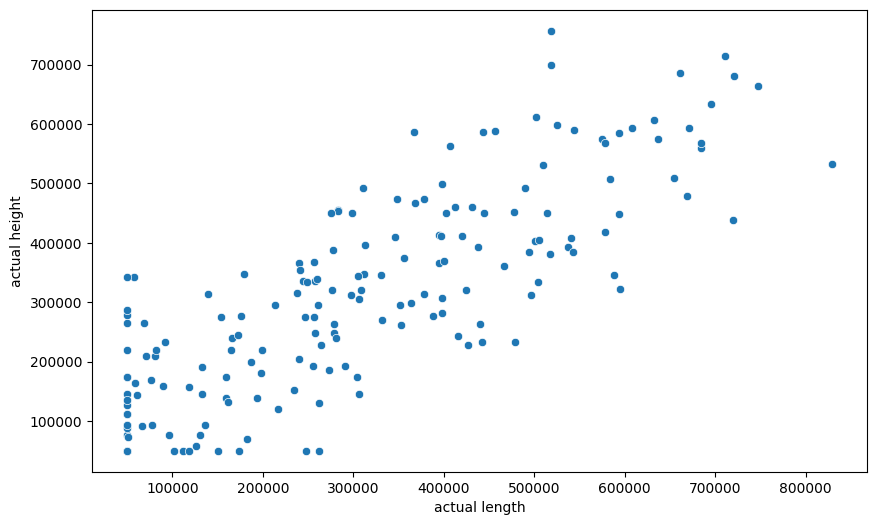

In [15]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("actual length")
plt.ylabel("actual height")
plt.show()

In [16]:
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,4,2023,20.92,3078,107,0,1,1,813805.13
1,4,2017,20.65,2844,339,1,3,1,501144.16
2,0,2007,10.19,964,398,0,0,0,465527.87
3,3,2022,17.27,1577,361,0,2,0,635489.75
4,5,2018,21.53,2386,135,1,3,0,281206.83
...,...,...,...,...,...,...,...,...,...
895,4,2018,21.48,1949,301,1,1,1,757209.24
896,0,2018,16.11,3313,195,1,0,0,500238.96
897,4,2021,23.21,976,101,1,0,0,587924.94
898,4,2019,12.66,2521,314,0,3,1,579831.93


In [17]:
new=pd.DataFrame({
    "brand":[4],
    "year":[2001],
    "mileage_kmpl":[20.21],
    "engine_cc":[2341],
    "horsepower":[108],
    "transmission":[0],
    "fuel_type":[1],
    "owner_type":[1]

})
predicts=model.predict(new)
predicts

array([521676.29])